In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
data=pd.read_csv("/kaggle/input/weight-height/weight-height.csv")
data.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
for i in range(0,10000):
    j=data['Weight'][i]
    k=data['Height'][i]
    data['Weight'][i]=j*0.453592
    data['Height'][i]=k*0.0328084
data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Gender,Height,Weight
0,Male,2.422802,109.720985
1,Male,2.256624,73.622732
2,Male,2.431434,96.497550
3,Male,2.353379,99.809504
4,Male,2.292710,93.598619
5,Male,2.206464,69.042216
6,Male,2.256728,83.428219
7,Male,2.242405,76.190352
8,Male,2.198785,79.800187
9,Male,2.081906,70.941642


In [5]:
data.tail()

,Gender,Height,Weight
9995,Female,2.171019,62.041159
9996,Female,2.200366,77.504315
9997,Female,2.095407,58.275377
9998,Female,2.264903,74.322166
9999,Female,2.032292,51.550324


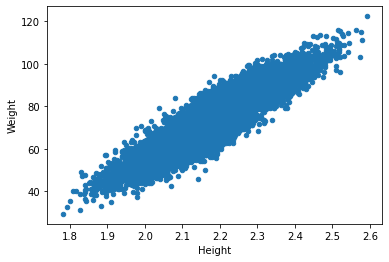

In [6]:
data.plot(kind='scatter',x='Height',y='Weight')
plt.show()

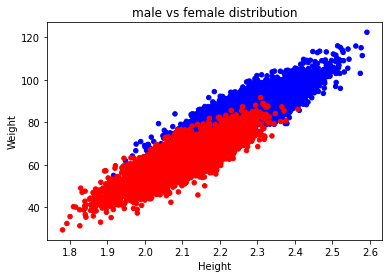

In [7]:
data['gendercolor']=data['Gender'].map({'Male':'blue','Female':'red'})
data.plot(kind='scatter',x='Height',y='Weight',c=data['gendercolor'],title='male vs female distribution')

In [8]:
data.isnull().sum()

Gender         0
Height         0
Weight         0
gendercolor    0
dtype: int64

In [9]:
data.skew()

Height    0.049369
Weight    0.032955
dtype: float64

data is fairly symmetrical

In [10]:
data.drop(['gendercolor'],axis=1,inplace=True)
data.head()

,Gender,Height,Weight
0,Male,2.422802,109.720985
1,Male,2.256624,73.622732
2,Male,2.431434,96.497550
3,Male,2.353379,99.809504
4,Male,2.292710,93.598619


In [11]:
x=data.drop(['Weight'],axis=1)
y=data['Weight']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [13]:
model=CatBoostRegressor(cat_features=['Gender'],verbose=False)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
error=np.sqrt(mean_squared_error(y_test,y_pred))
print(error)
from sklearn.metrics import r2_score
r2_er=r2_score(y_test,y_pred)
print(r2_er)

4.64711694527379
0.9014493272241106


In [14]:
print(model.predict(['Female',5.1]))

83.14325136708267
